In [3]:
import pandas as pd
data = pd.read_csv('./sndHsPr.csv')
data.head()

,dist,roomnum,halls,AREA,floor,subway,school,price
0,chaoyang,1,0,46.06,middle,1,0,48850
1,chaoyang,1,1,59.09,middle,1,0,46540
2,haidian,5,2,278.95,high,1,1,71662
3,haidian,3,2,207.00,high,1,1,57972
4,fengtai,2,1,53.32,low,1,1,71268


In [6]:
data.describe(include='all')

,dist,roomnum,halls,AREA,floor,subway,school,price
count,16210,16210.000000,16210.000000,16210.000000,16210,16210.000000,16210.000000,16210.000000
unique,6,NaN,NaN,NaN,3,NaN,NaN,NaN
top,fengtai,NaN,NaN,NaN,middle,NaN,NaN,NaN
freq,2947,NaN,NaN,NaN,5580,NaN,NaN,NaN
mean,NaN,2.166194,1.221407,91.746598,NaN,0.827822,0.303085,61151.810919
std,NaN,0.809907,0.532048,44.000768,NaN,0.377546,0.459606,22293.358147
min,NaN,1.000000,0.000000,30.060000,NaN,0.000000,0.000000,18348.000000
25%,NaN,2.000000,1.000000,60.000000,NaN,1.000000,0.000000,42812.250000
50%,NaN,2.000000,1.000000,78.830000,NaN,1.000000,0.000000,57473.000000
75%,NaN,3.000000,2.000000,110.517500,NaN,1.000000,1.000000,76099.750000


In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from numpy import corrcoef, array
from statsmodels.formula.api import ols

Text(0, 0.5, 'num')

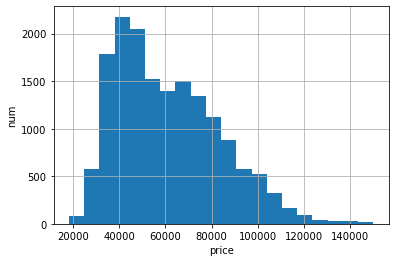

In [9]:
data.price.hist(bins=20)
plt.xlabel('price')
plt.ylabel('num')

In [12]:
data.price.agg(['mean', 'median', 'std'])

mean      61151.810919
median    57473.000000
std       22293.358147
Name: price, dtype: float64

In [13]:
data.price.quantile([0.25,0.5,0.75])

0.25    42812.25
0.50    57473.00
0.75    76099.75
Name: price, dtype: float64

In [16]:
pd.concat([data[data.price == min(data.price)], data[data.price==max(data.price)]])

,dist,roomnum,halls,AREA,floor,subway,school,price
2738,fengtai,2,2,100.83,high,0,0,18348
12788,xicheng,3,1,77.40,low,1,0,149871


In [19]:
# 频次分析
for i in range(7):
    if i!= 3:
        print(data.columns.values[i], ':')
        print(data[data.columns.values[i]].value_counts().T)
        print('=======================')
    else:
        continue

dist :
fengtai        2947
haidian        2919
chaoyang       2864
dongcheng      2783
xicheng        2750
shijingshan    1947
Name: dist, dtype: int64
roomnum :
2    7971
3    4250
1    3212
4     675
5     102
Name: roomnum, dtype: int64
halls :
1    11082
2     4231
0      812
3       85
Name: halls, dtype: int64
floor :
middle    5580
high      5552
low       5078
Name: floor, dtype: int64
subway :
1    13419
0     2791
Name: subway, dtype: int64
school :
0    11297
1     4913
Name: school, dtype: int64


In [21]:
data['AREA'].agg(['min','mean', 'max', 'median', 'std'])

min        30.060000
mean       91.746598
max       299.000000
median     78.830000
std        44.000768
Name: AREA, dtype: float64

#### 分类变量对房价的影响
地区的影响

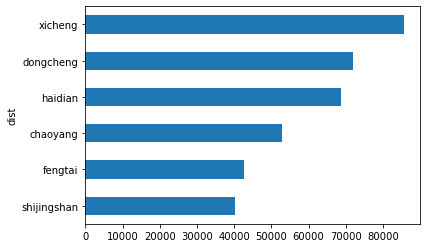

In [24]:
data.groupby('dist').price.mean().sort_values(ascending=True).plot(kind='barh')

C:\Users\TurboLoong\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


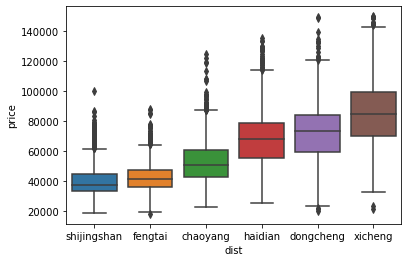

In [29]:
data1 = data[['dist', 'price']]
data1.dist = data1.dist.astype('category')
data1.dist.cat.set_categories(['shijingshan', 'fengtai','chaoyang','haidian','dongcheng','xicheng'], inplace=True)
sns.boxplot(x='dist', y='price', data=data1)

##### 房屋内部环境对房价的影响

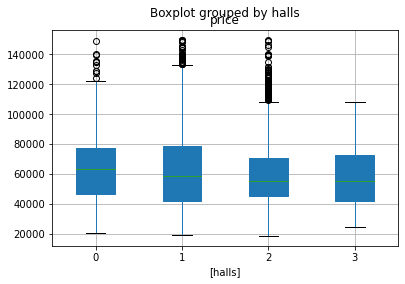

In [46]:
data2 = data[['halls', 'price']]
data2.boxplot(by='halls', patch_artist=True)

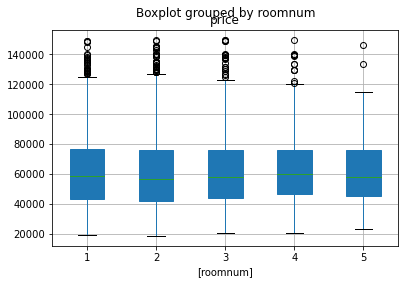

In [39]:
data3 = data[['roomnum', 'price']]
data3.boxplot(by='roomnum', patch_artist=True)

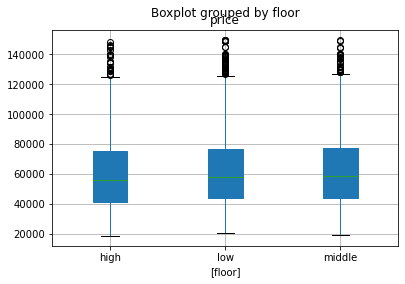

In [40]:
data4 = data[['floor', 'price']]
data4.boxplot(by='floor', patch_artist=True)

不同卧室数的房价差别不大  
厅数对单位面积房价有轻微影响    
不同楼层的单位面积房价差异不明显

##### 房屋外部对房价的影响
学区房，地铁房

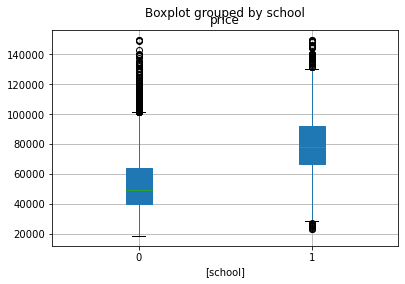

In [47]:
data_school = data[['school', 'price']]
data_school.boxplot(by='school', patch_artist=True)

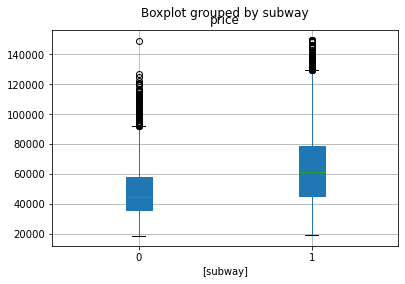

In [48]:
data_subway = data[['subway', 'price']]
data_subway.boxplot(by='subway', patch_artist=True)

#### 连续性变量对房价的影响

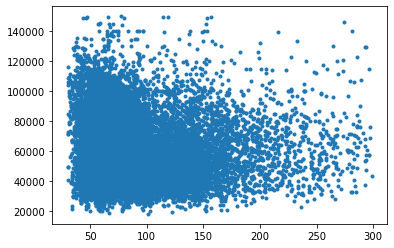

In [51]:
data_area = data[['AREA','price']]
plt.scatter(data_area.AREA, data_area.price, marker='.')

##### 结论
区对房价影响较大   
卧室数对房价影响不大    
客厅数对房价有轻微影响    
不同楼层对房价差异不明显    
地铁房单价高   
学区房单价高      

需要使用的自变量：区，客厅数，不同楼层，地铁房，学区房    